# Lewis Hamilton v. Top Drivers

![title](lewis.jpg)

Lewis Hamilton is a six-time Forumla One World Champion and lightly regarded as the greatest Formula One Driver of all time. He won his first World Driver's Championship with McLaren in 2008 and then moved to Mercedes, where he proceeded to win his 5 remaining titles. The notebook will observe Hamilton in comparison to his competitors. What records and how many does he hold? How did he fare in races compared to other legends? Finally, is the driver or their car that decides success?

In [1]:
# import dependencies

import numpy as np
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import gmaps
from datetime import date
from api_keys import g_key
warnings.filterwarnings("ignore")

In [2]:
#create functions

def getMiliSeconds(time):
    try:
        if '.' in time:
            x = datetime.datetime.strptime(time,'%M:%S.%f')
        elif ',' in time:
            x = datetime.datetime.strptime(time,'%M:%S,%f')
        else:
            x = datetime.datetime.strptime(time,'%M:%S:%f')
        return datetime.timedelta(minutes=x.minute,seconds=x.second, microseconds = x.microsecond).total_seconds()
    except:
        x = datetime.datetime.strptime(str(time).split('.')[0],'%M:%S:%f')
        return datetime.timedelta(minutes=x.minute,seconds=x.second, microseconds = x.microsecond).total_seconds()

def wins_per_year(driverRef, year):
    try:
        return topTenYears.loc[(topTenYears['driverRef'] == driverRef) & (topTenYears['positionOrder'] == 1) & (topTenYears['year'] == year)].groupby('driverId')['raceId'].count().values[0]
    except:
        return 0

def championsInYears(years, driverRef):
    total = []
    t = 0
    for year in years:
        winner = r.loc[r['year']== year].groupby('driverRef')['points'].sum().sort_values(ascending = False).index[0]
        if winner == driverRef:
            t = t + 1
        total.append(t)
    return total

def calculate_age(born):
        born = datetime.datetime.strptime(born, "%m/%d/%Y").date()
        today = date.today()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [3]:
#read in CSVs and create a clean data frame

df_races  = pd.read_csv('Resources/races.csv')
df_drivers = pd.read_csv('Resources/drivers.csv',encoding='latin1')
df_constructors = pd.read_csv('Resources/constructors.csv',encoding='latin-1')
df_results = pd.read_csv('Resources/results.csv',encoding='latin-1')

df_drivers['fullName'] = df_drivers['forename'] +" "+ df_drivers['surname']
results = pd.merge(df_results,df_drivers, on='driverId',how='inner')

df1 = results[['raceId','driverId','constructorId','positionOrder','points','dob','nationality','fullName']].copy()
race_data = pd.merge(df1,df_races, on='raceId',how='inner')

df2 = race_data[['raceId','driverId','constructorId','positionOrder','points','dob','nationality','fullName','year','name']].copy()
constructor_data = pd.merge(df2,df_constructors, on='constructorId',how='inner')

df3 = constructor_data [['positionOrder','points','dob','nationality_x','fullName','year','name_x','name_y','nationality_y']].copy()

df4 = df3.rename(columns={'positionOrder': 'Position', 
                          'points': 'Points', 
                          'dob' : 'DOB', 
                          'nationality_x':'Driver_Nationality',
                          'fullName':'Driver_Name',
                          'year':'Race_Year',
                          'name_x':'Race_Name',
                          'name_y':'Contractor',
                          'nationality_y':'Contractor_Nationality'})

clean_data = df4[df4["Race_Year"] >=2010 ]
clean_data['Age'] = clean_data['DOB'].apply(calculate_age)

        
clean_data.head()

,Position,Points,DOB,Driver_Nationality,Driver_Name,Race_Year,Race_Name,Contractor,Contractor_Nationality,Age
104,3,15.0,1/7/1985,British,Lewis Hamilton,2010,Bahrain Grand Prix,McLaren,British,35
105,7,6.0,1/19/1980,British,Jenson Button,2010,Bahrain Grand Prix,McLaren,British,40
106,6,8.0,1/7/1985,British,Lewis Hamilton,2010,Australian Grand Prix,McLaren,British,35
107,1,25.0,1/19/1980,British,Jenson Button,2010,Australian Grand Prix,McLaren,British,40
108,6,8.0,1/7/1985,British,Lewis Hamilton,2010,Malaysian Grand Prix,McLaren,British,35


In [4]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4537 entries, 104 to 11082
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position                4537 non-null   int64  
 1   Points                  4537 non-null   float64
 2   DOB                     4537 non-null   object 
 3   Driver_Nationality      4537 non-null   object 
 4   Driver_Name             4537 non-null   object 
 5   Race_Year               4537 non-null   int64  
 6   Race_Name               4537 non-null   object 
 7   Contractor              4537 non-null   object 
 8   Contractor_Nationality  4537 non-null   object 
 9   Age                     4537 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 389.9+ KB


In [5]:
clean_data.shape

(4537, 10)

In [6]:
clean_data.describe()

,Position,Points,Race_Year,Age
count,4537.000000,4537.000000,4537.000000,4537.000000
mean,11.370730,4.703989,2014.694732,33.105576
std,6.349402,7.097542,3.087288,6.196809
min,1.000000,0.000000,2010.000000,20.000000
25%,6.000000,0.000000,2012.000000,29.000000
50%,11.000000,0.000000,2015.000000,33.000000
75%,17.000000,8.000000,2017.000000,37.000000
max,24.000000,50.000000,2020.000000,51.000000


# Data by Nationality

![title](nationality.jpg)

How does Lewis Hamilton's sucess contribute to Nationality Data?

From a nationality standpoint, Germany leads in almost all regards. German Drivers and Contractors lead all other nations in Total Points Accumlated in Grand Prix's from 2010-2020. German Contractors also lead in Total Wins for Grand Prix's from 2010-2020. However, the data is clear that Britain Driver's lead in Total Wins for Grand Prix's from 2010-2020. This shift is caused by Lewis Hamilton, a British driver for a German Contractor, Mercedes. Hamilton drove for McLaren until 2013, where he only won a sinlge World Championship Title, after moving to Mercedes, he proceeded to win 5 more titles further winning for British Drivers and German Contractors.

The data would suggest that driving a car from a German Contractor could lead to higher success. This could be because of Germany's long history in formula 1 racing and/or that Germany often has a home field advantage. More races occur in Germany than any other country. 

In [7]:
#create dataframes for nationality

#driver nationality
driver_nationality= clean_data
driver_nationality['DriverN_TTL_PTS']=driver_nationality.groupby(by='Driver_Nationality')['Points'].transform('sum').sort_values()
driver_nationality = driver_nationality.loc[clean_data['Position']==1]
driver_nationality['DriverN_TTL_Wins']=driver_nationality.groupby(by='Driver_Nationality')['Position'].transform('count').sort_values()
d_nation = driver_nationality.drop_duplicates(subset=['Driver_Nationality'])

driver_nation = d_nation [['Driver_Nationality','DriverN_TTL_PTS','DriverN_TTL_Wins']].copy()
driver_nation

,Driver_Nationality,DriverN_TTL_PTS,DriverN_TTL_Wins
107,British,4583.0,89
2062,Venezuelan,76.0,1
4777,Spanish,1685.0,11
4972,German,5279.0,71
5123,Finnish,2750.0,12
5156,Monegasque,378.0,2
7392,Australian,1998.0,14
7623,Dutch,1110.0,9
11074,French,807.0,1


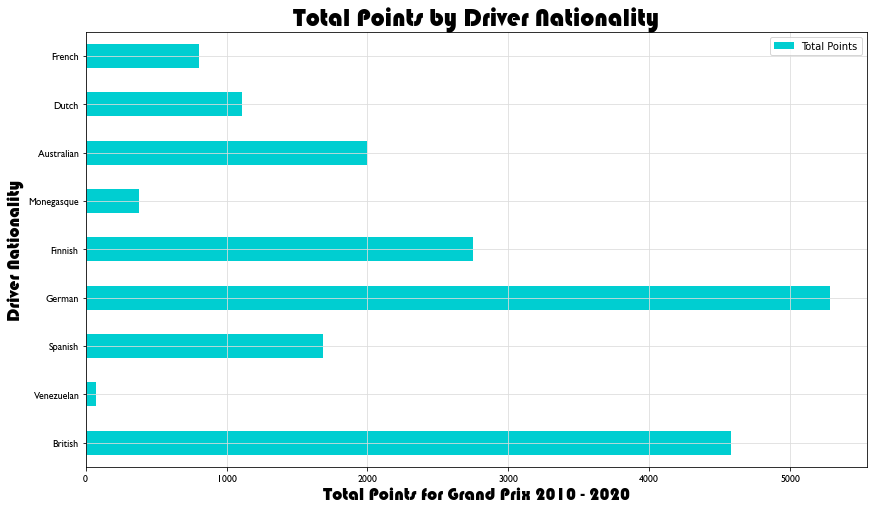

In [8]:
fig1 = driver_nation.plot.barh(x='Driver_Nationality', y='DriverN_TTL_PTS', figsize=(14, 8),color='darkturquoise')

plt.title("Total Points by Driver Nationality",fontsize=25,fontname='bauhaus 93')
plt.ylabel('Driver Nationality',fontsize = 18, fontname='bauhaus 93')
plt.xlabel('Total Points for Grand Prix 2010 - 2020',fontsize = 18,fontname='bauhaus 93')
plt.yticks(fontname = "gill sans mt")
plt.xticks(fontname = "gill sans mt")
plt.legend(['Total Points'])
plt.grid(color='gainsboro')

plt.show()

In [9]:
#contractor nationality
contractor_nationality= clean_data
contractor_nationality['ConN_TTL_PTS']=contractor_nationality.groupby(by='Contractor_Nationality')['Points'].transform('sum').sort_values()
contractor_nationality = contractor_nationality.loc[clean_data['Position']==1]
contractor_nationality['ConN_TTL_Wins']=contractor_nationality.groupby(by='Contractor_Nationality')['Position'].transform('count').sort_values()
c_nation = contractor_nationality.drop_duplicates(subset=['Contractor_Nationality'])

contract_nation = c_nation [['Contractor','Contractor_Nationality','ConN_TTL_PTS','ConN_TTL_Wins']].copy()
contract_nation

,Contractor,Contractor_Nationality,ConN_TTL_PTS,ConN_TTL_Wins
107,McLaren,British,3978.0,21
4777,Ferrari,Italian,4840.0,29
7389,Red Bull,Austrian,4694.0,57
8602,Mercedes,German,5547.0,103


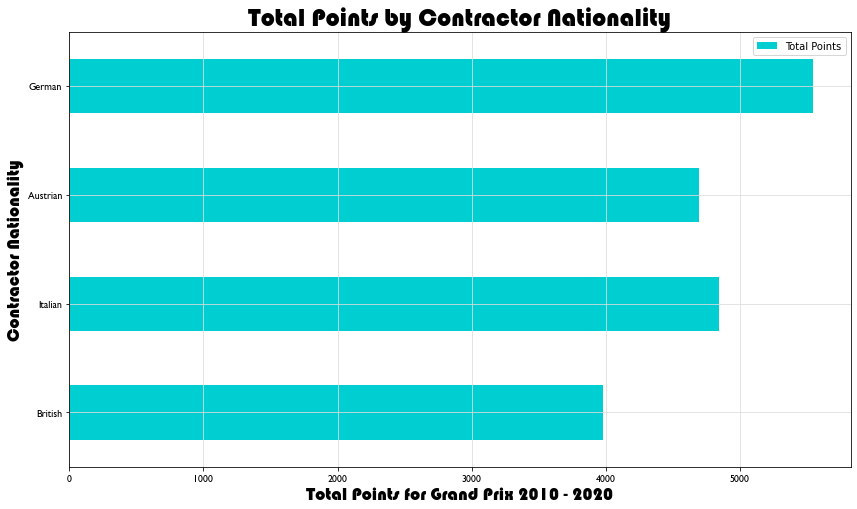

In [10]:
fig2 = contract_nation.plot.barh(x='Contractor_Nationality', y='ConN_TTL_PTS', figsize=(14, 8),color='darkturquoise')

plt.title("Total Points by Contractor Nationality",fontsize=25,fontname='bauhaus 93')
plt.ylabel('Contractor Nationality',fontsize = 18, fontname='bauhaus 93')
plt.xlabel('Total Points for Grand Prix 2010 - 2020',fontsize = 18,fontname='bauhaus 93')
plt.yticks(fontname = "gill sans mt")
plt.xticks(fontname = "gill sans mt")
plt.legend(['Total Points'])
plt.grid(color='gainsboro')

plt.show()

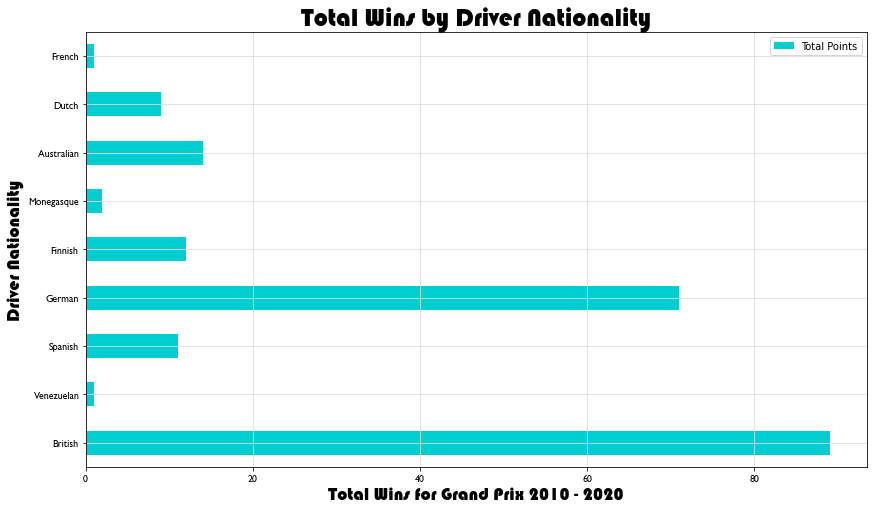

In [14]:
fig3 = driver_nation.plot.barh(x='Driver_Nationality', y='DriverN_TTL_Wins', figsize=(14, 8),color='darkturquoise')

plt.title("Total Wins by Driver Nationality",fontsize=25,fontname='bauhaus 93')
plt.ylabel('Driver Nationality',fontsize = 18, fontname='bauhaus 93')
plt.xlabel('Total Wins for Grand Prix 2010 - 2020',fontsize = 18,fontname='bauhaus 93')
plt.yticks(fontname = "gill sans mt")
plt.xticks(fontname = "gill sans mt")
plt.legend(['Total Points'])
plt.grid(color='gainsboro')

plt.show()

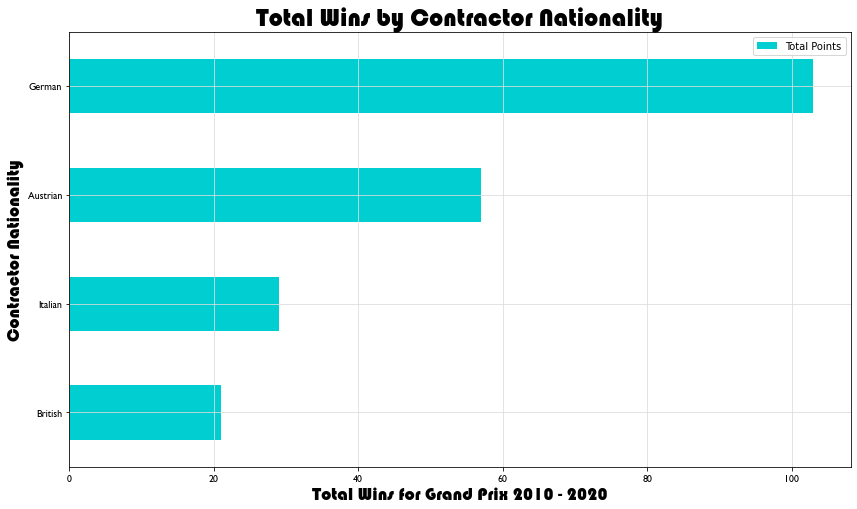

In [15]:
fig4 = contract_nation.plot.barh(x='Contractor_Nationality', y='ConN_TTL_Wins', figsize=(14, 8),color='darkturquoise')

plt.title("Total Wins by Contractor Nationality",fontsize=25,fontname='bauhaus 93')
plt.ylabel('Contractor Nationality',fontsize = 18, fontname='bauhaus 93')
plt.xlabel('Total Wins for Grand Prix 2010 - 2020',fontsize = 18,fontname='bauhaus 93')
plt.yticks(fontname = "gill sans mt")
plt.xticks(fontname = "gill sans mt")
plt.legend(['Total Points'])
plt.grid(color='gainsboro')

plt.show()

In [13]:
#read in race location data
race_loc = pd.read_csv("Resources/circuits.csv")

# configure heat map
city_locations = race_loc[["lat", "lng",]]
gmaps.configure(api_key=g_key)
fig = gmaps.figure(center=(48.0, 6.0), zoom_level=4)

heat_layer = gmaps.heatmap_layer(city_locations,
                                 dissipating=False,
                                 point_radius=3)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))